In [1]:
import pandas as pd
df = pd.read_csv('MVC_250418.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'MVC_250418.csv'

In [61]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,NaN,NaN,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,NaN,NaN,NaN,4806008,Sedan,Bike,NaN,NaN,NaN
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,NaN,NaN,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,NaN,NaN,NaN,4806072,Sedan,Sedan,NaN,NaN,NaN
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,NaN,NaN,NaN,NaN,4805968,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


In [62]:
df.shape

(2169507, 29)

In [63]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           670364
ZIP CODE                          670633
LATITUDE                          239853
LONGITUDE                         239853
LOCATION                          239853
ON STREET NAME                    467804
CROSS STREET NAME                 827755
OFF STREET NAME                  1794077
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7488
CONTRIBUTING FACTOR VEHICLE 2     344552
CONTRIBUTING FACTOR VEHICLE 3    2012948
CONTRIBUTING FACTOR VEHICLE 4    2133820
CONTRIBUTING FACTOR VEHICLE 5    2159750
COLLISION_ID                           0
VEHICLE TYPE COD

# Assign missing Boroughs using Nearest 

In [64]:
missing_boroughs = df[df['BOROUGH'].isnull()]

missing_with_location = missing_boroughs[
    missing_boroughs['LATITUDE'].notnull() & missing_boroughs['LONGITUDE'].notnull() #missing val with x and y cooridinate available
]

print(f"Number of rows with missing Borough but filled Latitude/Longitude: {len(missing_with_location)}")


Number of rows with missing Borough but filled Latitude/Longitude: 468103


In [65]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [66]:
known = df[df['BOROUGH'].notnull() & df['LATITUDE'].notnull() & df['LONGITUDE'].notnull()]
print(known['BOROUGH'].isnull().sum()) #should be 0

unknown = df[df['BOROUGH'].isnull() & df['LATITUDE'].notnull() & df['LONGITUDE'].notnull()]
print(unknown['BOROUGH'].isnull().sum()) #should be 468103

0
468103


In [67]:
nn_model = NearestNeighbors(n_neighbors=1)
nn_model.fit(known[['LATITUDE', 'LONGITUDE']])
distances, indices = nn_model.kneighbors(unknown[['LATITUDE', 'LONGITUDE']])
nearest_boroughs = known.iloc[indices.flatten()]['BOROUGH'].values
df.loc[unknown.index, 'BOROUGH'] = nearest_boroughs

In [68]:
print(df['BOROUGH'].isnull().sum()) #Should be 670364 - 468103

202261


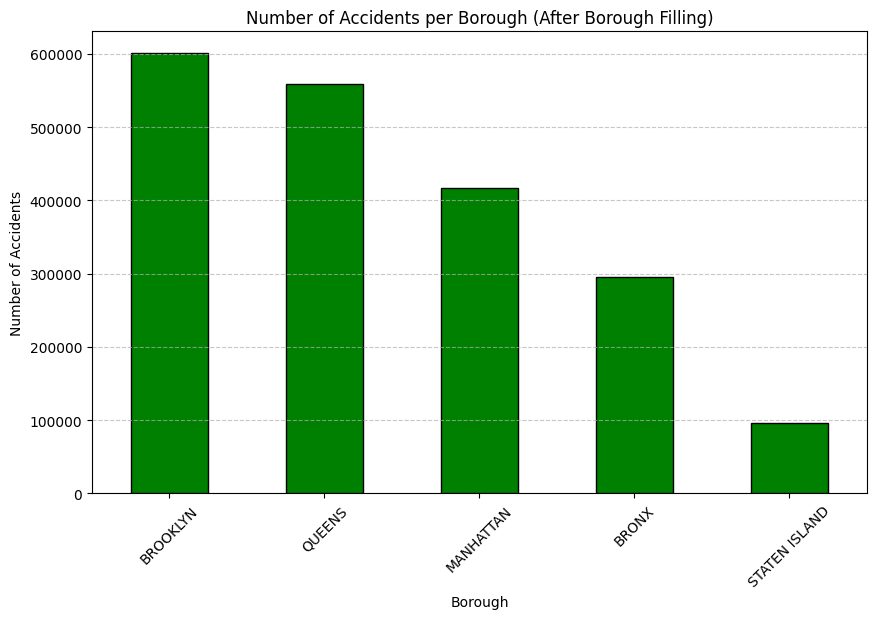

In [69]:
import matplotlib.pyplot as plt

borough_counts = df['BOROUGH'].value_counts()

plt.figure(figsize=(10,6))
borough_counts.plot(kind='bar', edgecolor='black', color = 'green')

plt.title('Number of Accidents per Borough (After Borough Filling)')
plt.xlabel('Borough')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [70]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,NaN,NaN
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,NaN,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,NaN,NaN,NaN,4806008,Sedan,Bike,NaN,NaN,NaN
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,NaN,NaN,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,NaN
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,NaN,NaN,NaN,4806072,Sedan,Sedan,NaN,NaN,NaN
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,NaN,NaN,NaN,NaN,4805968,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN


# Clean missing vehicle type values to None

In [71]:
vehicle_cols = [
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]

df[vehicle_cols] = df[vehicle_cols].fillna('None')


In [72]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,NaN,NaN,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,NaN,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,NaN,NaN,NaN,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,NaN,NaN,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,NaN,NaN,NaN,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,NaN,NaN,NaN,NaN,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Clean missing contributing factor type values to None

In [73]:
factor_cols = [
    'CONTRIBUTING FACTOR VEHICLE 1',
    'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3',
    'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5'
]

df[factor_cols] = df[factor_cols].fillna('None')

In [74]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,NaN,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Fill in Zip Code given Location

In [75]:
missing_zipcodes = df[df['ZIP CODE'].isnull()]
missing_zipcodes.shape

missing_zipcodes_with_location = missing_zipcodes[
    missing_zipcodes['LATITUDE'].notnull() & missing_zipcodes['LONGITUDE'].notnull() # missing ZIP but x and y coordinates available
]

print(f"Number of rows with missing ZIP CODE but filled Latitude/Longitude: {len(missing_zipcodes_with_location)}")


Number of rows with missing ZIP CODE but filled Latitude/Longitude: 468346


In [76]:
known_zip = df[
    df['ZIP CODE'].notnull() &
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull()
]

print(known_zip['ZIP CODE'].isnull().sum()) # should be 0

unknown_zip = df[
    df['ZIP CODE'].isnull() &
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull()
]

print(unknown_zip['ZIP CODE'].isnull().sum()) # should be 468346


0
468346


In [77]:
nn_zip_model = NearestNeighbors(n_neighbors=1)
nn_zip_model.fit(known_zip[['LATITUDE', 'LONGITUDE']])
zip_distances, zip_indices = nn_zip_model.kneighbors(unknown_zip[['LATITUDE', 'LONGITUDE']])
nearest_zipcodes = known_zip.iloc[zip_indices.flatten()]['ZIP CODE'].values
df.loc[unknown_zip.index, 'ZIP CODE'] = nearest_zipcodes

In [78]:
print(df['ZIP CODE'].isnull().sum()) #should be 670633 - 468346

202287


In [79]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,11373.0,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",NaN,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Fill missing 'ON STREET NAME' using Nearest Neighbors with Locaiton Coordinates

In [80]:
missing_streetnames = df[df['ON STREET NAME'].isnull()]
print(missing_streetnames.shape)

missing_streetnames_with_location = missing_streetnames[
    missing_streetnames['LATITUDE'].notnull() & missing_streetnames['LONGITUDE'].notnull() # missing street name but x and y available
]
print(f"Number of rows with missing ON STREET NAME but filled Latitude/Longitude: {len(missing_streetnames_with_location)}")

(467804, 29)
Number of rows with missing ON STREET NAME but filled Latitude/Longitude: 411211


In [81]:
known_streetnames = df[
    df['ON STREET NAME'].notnull() &
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull()
]
print(known_streetnames['ON STREET NAME'].isnull().sum())  # should be 0

unknown_streetnames = df[
    df['ON STREET NAME'].isnull() &
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull()
]
print(unknown_streetnames['ON STREET NAME'].isnull().sum())  # should be 411211


0
411211


In [82]:
nn_street_model = NearestNeighbors(n_neighbors=1)
nn_street_model.fit(known_streetnames[['LATITUDE', 'LONGITUDE']])
street_distances, street_indices = nn_street_model.kneighbors(unknown_streetnames[['LATITUDE', 'LONGITUDE']])
nearest_streets = known_streetnames.iloc[street_indices.flatten()]['ON STREET NAME'].values
df.loc[unknown_streetnames.index, 'ON STREET NAME'] = nearest_streets

In [83]:
print(df['ON STREET NAME'].isnull().sum())

56593


In [84]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,NaN,NaN,NaN,BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,11373.0,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",ATLANTIC AVENUE,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Fill missing LATITUDE and LONGITUDE using ON STREET NAME with means

In [85]:
# 1. Compute the mean lat/lon for each street (only from rows where both are present)
street_means = (
    df
    .dropna(subset=['ON STREET NAME', 'LATITUDE', 'LONGITUDE'])
    .groupby('ON STREET NAME')[['LATITUDE','LONGITUDE']]
    .mean()
)

# 2. For rows with a known street name, fill missing LATITUDE from that street's mean
mask = df['ON STREET NAME'].notnull()

df.loc[mask, 'LATITUDE'] = df.loc[mask, 'LATITUDE'].fillna(
    df.loc[mask, 'ON STREET NAME'].map(street_means['LATITUDE'])
)

# 3. Similarly fill missing LONGITUDE
df.loc[mask, 'LONGITUDE'] = df.loc[mask, 'LONGITUDE'].fillna(
    df.loc[mask, 'ON STREET NAME'].map(street_means['LONGITUDE'])
)

# 4. Verify
print("Still missing LATITUDE:", df['LATITUDE'].isnull().sum())
print("Still missing LONGITUDE:", df['LONGITUDE'].isnull().sum())


Still missing LATITUDE: 66805
Still missing LONGITUDE: 66805


In [86]:
df['ON STREET NAME'].isnull().sum()

np.int64(56593)

# Fill in Location column with new  Longitude and Latitude

In [87]:
mask_missing_location = (
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull() &
    df['LOCATION'].isnull()
)

df.loc[mask_missing_location, 'LOCATION'] = df.loc[mask_missing_location].apply(
    lambda row: f"({row['LATITUDE']}, {row['LONGITUDE']})",
    axis=1
)


In [88]:
print(df["LOCATION"].isnull().sum())

66805


In [89]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,40.616843,-73.535899,"(40.616843008090186, -73.53589886127321)",WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,NaN,NaN,40.750223,-73.955238,"(40.7502231, -73.9552383)",QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,NaN,NaN,40.804719,-73.802811,"(40.80471912608696, -73.80281051304348)",THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,NaN,NaN,40.703752,-73.993770,"(40.70375224166667, -73.99376973333334)",BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,11373.0,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",ATLANTIC AVENUE,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


# Fill Missing ZIP CODE Using Nearest Neighbors (again)

In [90]:
missing_zipcodes = df[df['ZIP CODE'].isnull()]
print(missing_zipcodes.shape)  # See how many missing ZIP CODEs

missing_zipcodes_with_location = missing_zipcodes[
    missing_zipcodes['LATITUDE'].notnull() & missing_zipcodes['LONGITUDE'].notnull()
]
print(f"Number of rows with missing ZIP CODE but filled Latitude/Longitude: {len(missing_zipcodes_with_location)}")

known_zipcodes = df[
    df['ZIP CODE'].notnull() &
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull()
]
print(known_zipcodes['ZIP CODE'].isnull().sum())  # Should be 0

unknown_zipcodes = df[
    df['ZIP CODE'].isnull() &
    df['LATITUDE'].notnull() &
    df['LONGITUDE'].notnull()
]
print(unknown_zipcodes['ZIP CODE'].isnull().sum())  # Should match missing_with_location count

nn_zip_model = NearestNeighbors(n_neighbors=1)
nn_zip_model.fit(known_zipcodes[['LATITUDE', 'LONGITUDE']])

zip_distances, zip_indices = nn_zip_model.kneighbors(unknown_zipcodes[['LATITUDE', 'LONGITUDE']])

nearest_zipcodes = known_zipcodes.iloc[zip_indices.flatten()]['ZIP CODE'].values
df.loc[unknown_zipcodes.index, 'ZIP CODE'] = nearest_zipcodes

print('Missing ZIP CODE after filling:', df['ZIP CODE'].isnull().sum())

(202287, 29)
Number of rows with missing ZIP CODE but filled Latitude/Longitude: 146048
0
146048
Missing ZIP CODE after filling: 56239


# Match ZIP CODE to find BOROUGH 

In [91]:
df['ZIP CODE'] = df['ZIP CODE'].astype(str)

zip_borough_map = (
    df[df['BOROUGH'].notnull() & df['ZIP CODE'].notnull()]
    .groupby('ZIP CODE')['BOROUGH']
    .agg(lambda x: x.mode()[0])
    .to_dict()
)

print({z: zip_borough_map[z] for z in list(zip_borough_map)[:10]})

mask_has_zip = df['ZIP CODE'].notnull()
df.loc[mask_has_zip, 'BOROUGH'] = df.loc[mask_has_zip, 'ZIP CODE'].map(zip_borough_map)

print("Missing BOROUGH after deterministic ZIP mapping:", df['BOROUGH'].isnull().sum())

{'     ': 'QUEENS', '10000': 'MANHATTAN', '10000.0': 'MANHATTAN', '10001': 'MANHATTAN', '10001.0': 'MANHATTAN', '10002': 'MANHATTAN', '10002.0': 'MANHATTAN', '10003': 'MANHATTAN', '10003.0': 'MANHATTAN', '10004': 'MANHATTAN'}
Missing BOROUGH after deterministic ZIP mapping: 0


In [92]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
LATITUDE                           66805
LONGITUDE                          66805
LOCATION                           66805
ON STREET NAME                     56593
CROSS STREET NAME                 827755
OFF STREET NAME                  1794077
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1          0
CONTRIBUTING FACTOR VEHICLE 2          0
CONTRIBUTING FACTOR VEHICLE 3          0
CONTRIBUTING FACTOR VEHICLE 4          0
CONTRIBUTING FACTOR VEHICLE 5          0
COLLISION_ID                           0
VEHICLE TYPE COD

In [93]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,BRONX,10451.0,40.616843,-73.535899,"(40.616843008090186, -73.53589886127321)",WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,None,None,None,4455765,Sedan,Sedan,None,None,None
1,03/26/2022,11:45,QUEENS,11101.0,40.750223,-73.955238,"(40.7502231, -73.9552383)",QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,None,None,None,4513547,Sedan,None,None,None,None
2,11/01/2023,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,Unspecified,Unspecified,None,None,4675373,Moped,Sedan,Sedan,None,None
3,06/29/2022,6:55,BRONX,10458.0,40.804719,-73.802811,"(40.80471912608696, -73.80281051304348)",THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4541903,Sedan,Pick-up Truck,None,None,None
4,09/21/2022,13:21,BROOKLYN,11201.0,40.703752,-73.993770,"(40.70375224166667, -73.99376973333334)",BROOKLYN BRIDGE,NaN,NaN,...,Unspecified,None,None,None,4566131,Station Wagon/Sport Utility Vehicle,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2169502,04/14/2025,17:58,QUEENS,11373.0,40.740600,-73.879320,"(40.7406, -73.87932)",BROADWAY,DONGAN AVE,NaN,...,Unspecified,None,None,None,4806008,Sedan,Bike,None,None,None
2169503,04/12/2025,16:10,BROOKLYN,11217.0,40.687040,-73.985530,"(40.68704, -73.98553)",ATLANTIC AVENUE,NaN,388 ATLANTIC AVE,...,Unspecified,Unspecified,None,None,4806051,Moped,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,None,None
2169504,04/12/2025,0:08,STATEN ISLAND,10306.0,40.562298,-74.106170,"(40.562298, -74.10617)",MILTON AVE,EBBITTS ST,NaN,...,Unspecified,None,None,None,4806072,Sedan,Sedan,None,None,None
2169505,04/14/2025,10:45,QUEENS,11435.0,40.686478,-73.800780,"(40.686478, -73.80078)",144 ST,111 AVE,NaN,...,None,None,None,None,4805968,Station Wagon/Sport Utility Vehicle,None,None,None,None


In [94]:
# Consistnet format for vehicle types

In [95]:
vehicle_cols = [
    'VEHICLE TYPE CODE 1',
    'VEHICLE TYPE CODE 2',
    'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4',
    'VEHICLE TYPE CODE 5'
]

df[vehicle_cols] = df[vehicle_cols].apply(lambda col: col.str.upper())

# EDA

In [96]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH DATE'])

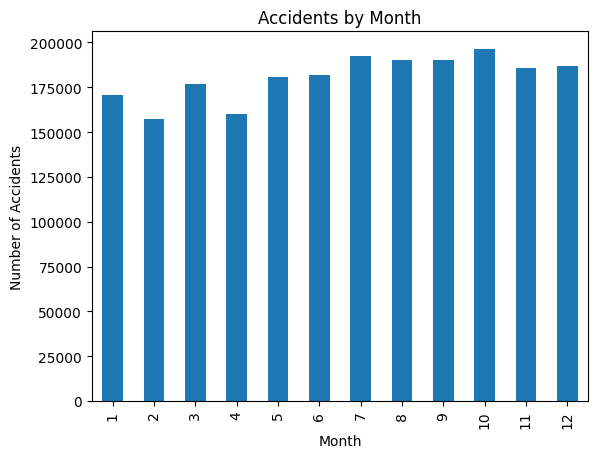

In [97]:
df['MONTH'] = df['CRASH_DATE'].dt.month
month_counts = df['MONTH'].value_counts().sort_index()
plt.figure()
month_counts.plot(kind='bar')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


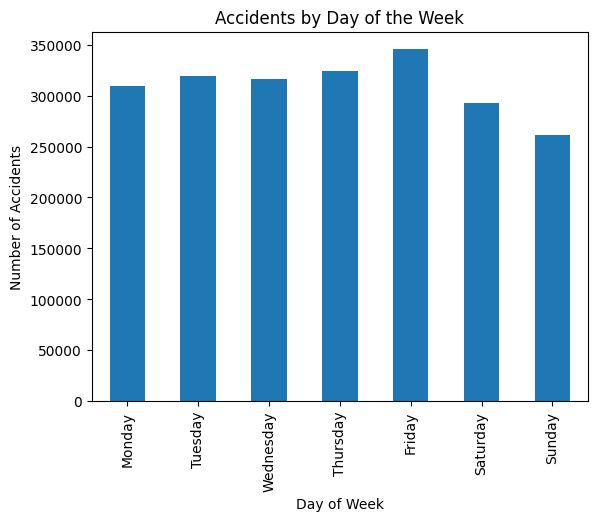

In [98]:
df['DAY_OF_WEEK'] = df['CRASH_DATE'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['DAY_OF_WEEK'].value_counts().reindex(day_order)
plt.figure()
day_counts.plot(kind='bar')
plt.title('Accidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

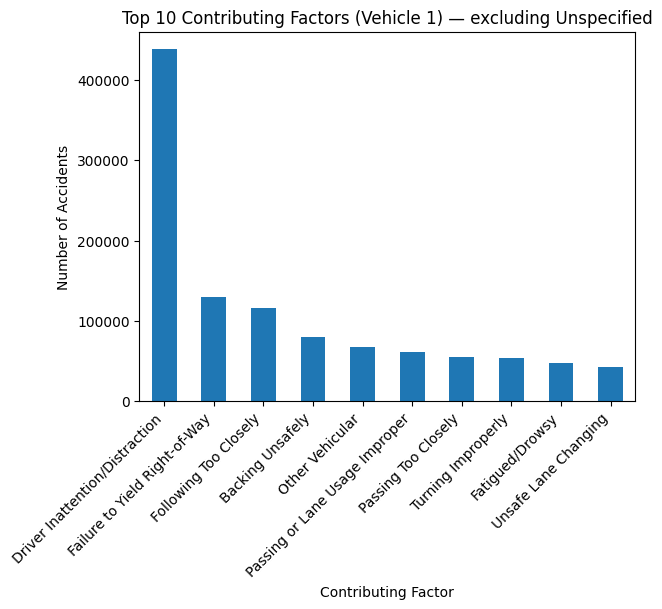

In [99]:
causes = df['CONTRIBUTING FACTOR VEHICLE 1']
causes = causes[~causes.isin(['Unspecified', 'None'])]

factor_counts = causes.value_counts().head(10)

plt.figure()
factor_counts.plot(kind='bar')
plt.title('Top 10 Contributing Factors (Vehicle 1) — excluding Unspecified')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

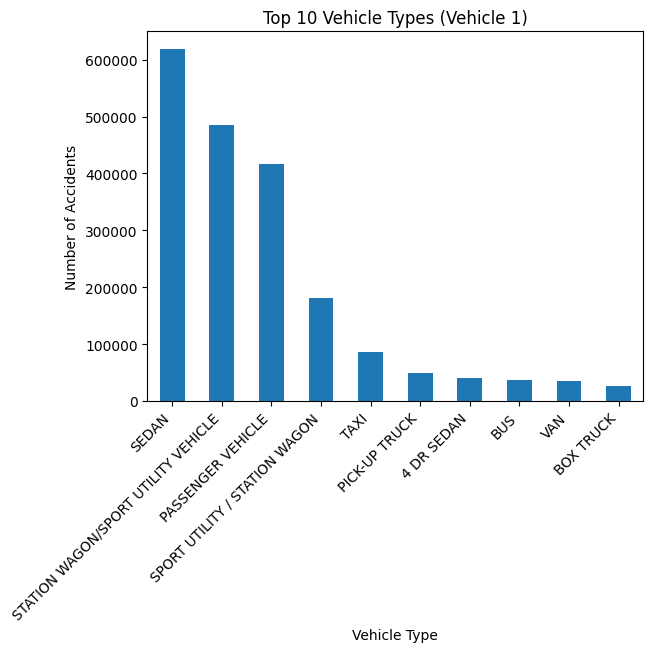

In [100]:
df['VEHICLE TYPE CODE 1'] = df['VEHICLE TYPE CODE 1'].fillna('None')

vehicle_counts = df['VEHICLE TYPE CODE 1'].value_counts().head(10)

plt.figure()
vehicle_counts.plot(kind='bar')
plt.title('Top 10 Vehicle Types (Vehicle 1)')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


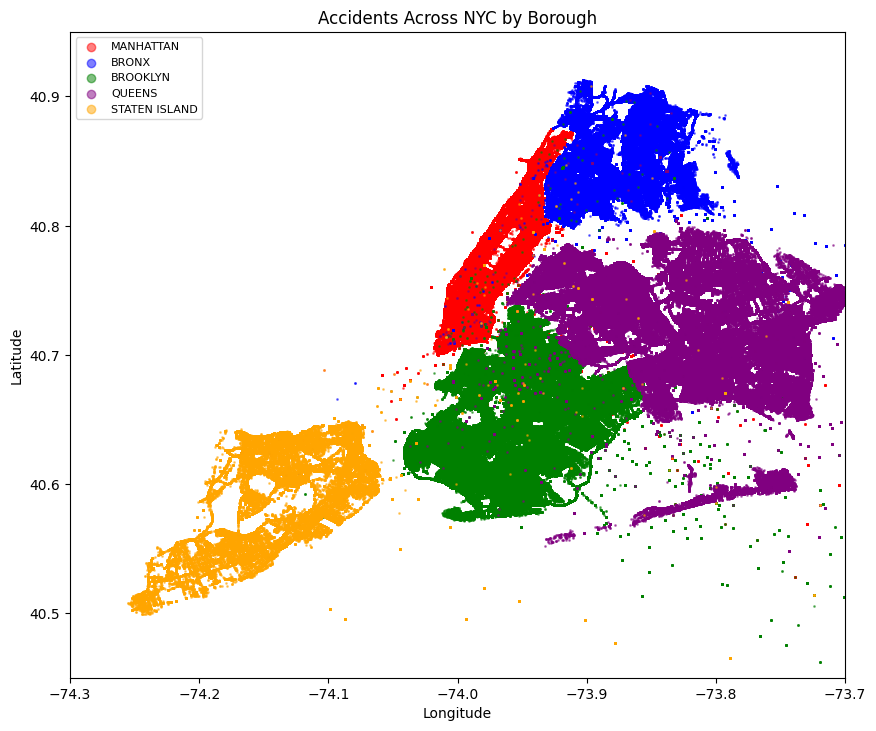

In [101]:
borough_colors = {
    'MANHATTAN': 'red',
    'BRONX': 'blue',
    'BROOKLYN': 'green',
    'QUEENS': 'purple',
    'STATEN ISLAND': 'orange'
}

df_valid = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

plt.figure(figsize=(10, 12))

for borough, color in borough_colors.items():
    borough_df = df_valid[df_valid['BOROUGH'] == borough]
    plt.scatter(
        borough_df['LONGITUDE'],
        borough_df['LATITUDE'],
        color=color,
        label=borough,
        s=1,
        alpha=0.5
    )

plt.title('Accidents Across NYC by Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim([-74.3, -73.7])
plt.ylim([40.45, 40.95])
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(markerscale=6, fontsize=8)
plt.show()


# Daily weather setup

In [102]:
import pandas as pd

# parse the timestamp (and drop the “+00:00” UTC indicator if you like)
w_df = pd.read_csv(
    "nyc_weather_data.csv",
    parse_dates=["date"],
    date_parser=lambda s: pd.to_datetime(s, utc=True)
)

print(w_df.shape)
print(w_df.dtypes)
w_df.head()


(16960, 15)
date                             datetime64[ns, UTC]
borough                                       object
rain_sum                                     float64
precipitation_probability_max                float64
sunshine_duration                            float64
showers_sum                                  float64
wind_speed_10m_max                           float64
snowfall_sum                                 float64
wind_gusts_10m_max                           float64
temperature_2m_min                           float64
daylight_duration                            float64
wind_direction_10m_dominant                  float64
precipitation_sum                            float64
precipitation_hours                          float64
uv_index_clear_sky_max                       float64
dtype: object


/var/folders/nq/mx790f9s7nx7cyr0m9fk1l0w0000gn/T/ipykernel_95914/3851134403.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  w_df = pd.read_csv(


,date,borough,rain_sum,precipitation_probability_max,sunshine_duration,showers_sum,wind_speed_10m_max,snowfall_sum,wind_gusts_10m_max,temperature_2m_min,daylight_duration,wind_direction_10m_dominant,precipitation_sum,precipitation_hours,uv_index_clear_sky_max
0,2016-01-01 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33501.793,NaN,NaN,0.0,NaN
1,2016-01-02 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33546.832,NaN,NaN,0.0,NaN
2,2016-01-03 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33595.676,NaN,NaN,0.0,NaN
3,2016-01-04 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33648.215,NaN,NaN,0.0,NaN
4,2016-01-05 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33704.360,NaN,NaN,0.0,NaN


# Missing Value Analysis

In [103]:
w_df.isna().sum().sort_values(ascending=False)

rain_sum                         16605
sunshine_duration                16605
showers_sum                      16605
wind_speed_10m_max               16605
snowfall_sum                     16605
wind_gusts_10m_max               16605
temperature_2m_min               16605
wind_direction_10m_dominant      16605
precipitation_sum                16605
uv_index_clear_sky_max           16605
precipitation_probability_max    16405
date                                 0
borough                              0
daylight_duration                    0
precipitation_hours                  0
dtype: int64

# Setting Date into Accident Format (CRASH DATE)

In [104]:
# create two new columns
w_df["CRASH DATE"] = w_df["date"].dt.strftime("%m/%d/%Y")   # → '01/01/2016', '09/11/2021'

# don’t need the original timestamp anymore
#df = df.drop(columns=["date"])

w_df

,date,borough,rain_sum,precipitation_probability_max,sunshine_duration,showers_sum,wind_speed_10m_max,snowfall_sum,wind_gusts_10m_max,temperature_2m_min,daylight_duration,wind_direction_10m_dominant,precipitation_sum,precipitation_hours,uv_index_clear_sky_max,CRASH DATE
0,2016-01-01 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33501.793,NaN,NaN,0.0,NaN,01/01/2016
1,2016-01-02 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33546.832,NaN,NaN,0.0,NaN,01/02/2016
2,2016-01-03 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33595.676,NaN,NaN,0.0,NaN,01/03/2016
3,2016-01-04 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33648.215,NaN,NaN,0.0,NaN,01/04/2016
4,2016-01-05 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33704.360,NaN,NaN,0.0,NaN,01/05/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16955,2025-04-10 04:00:00+00:00,Bronx,0.003937,22.0,27442.4080,0.0,14.085998,0.000000,17.672300,36.3047,47178.277,133.379840,0.003937,1.0,6.55,04/10/2025
16956,2025-04-11 04:00:00+00:00,Bronx,0.267717,96.0,7951.5483,0.0,11.677482,0.000000,31.765400,40.0847,47336.730,41.167206,0.267717,9.0,6.40,04/11/2025
16957,2025-04-12 04:00:00+00:00,Bronx,0.661417,100.0,0.0000,0.0,13.043840,0.551181,29.081000,35.4047,47494.250,4.143703,0.740158,12.0,6.40,04/12/2025
16958,2025-04-13 04:00:00+00:00,Bronx,0.000000,7.0,31327.3730,0.0,12.891410,0.000000,26.620298,38.6447,47650.715,326.153900,0.000000,0.0,6.45,04/13/2025


# Filtering from Date 9/11/2021 onwards (earliest date from historical accident data)

In [105]:

w_df["CRASH DATE"] = pd.to_datetime(w_df["CRASH DATE"], format="%m/%d/%Y")

# bounds
start = pd.to_datetime("2021-09-21")
end   = pd.to_datetime("2025-04-19")
w_df = w_df.loc[w_df["CRASH DATE"].between(start, end)].reset_index(drop=True)
print(w_df["CRASH DATE"].min(), w_df["CRASH DATE"].max())



2021-09-21 00:00:00 2025-04-14 00:00:00


In [106]:
w_df.describe()

,rain_sum,precipitation_probability_max,sunshine_duration,showers_sum,wind_speed_10m_max,snowfall_sum,wind_gusts_10m_max,temperature_2m_min,daylight_duration,wind_direction_10m_dominant,precipitation_sum,precipitation_hours,uv_index_clear_sky_max,CRASH DATE
count,355.000000,555.000000,355.000000,355.0,355.000000,355.000000,355.000000,355.000000,6510.000000,355.000000,355.000000,6510.000000,355.000000,6510
mean,0.093102,32.009009,25619.349184,0.0,14.705110,0.086015,29.016095,34.418815,43070.486969,215.032049,0.105390,0.135637,5.178451,2023-07-03 12:00:00.000000256
min,0.000000,0.000000,0.000000,0.0,5.910085,0.000000,12.303500,15.115101,33260.652000,4.143703,0.000000,0.000000,3.500000,2021-09-21 00:00:00
25%,0.000000,0.000000,8475.109500,0.0,11.306240,0.000000,23.041100,29.982650,36276.773000,147.543510,0.000000,0.000000,4.300000,2022-08-12 00:00:00
50%,0.000000,4.000000,33473.410000,0.0,14.078890,0.000000,27.738798,35.275100,42421.205000,253.204590,0.000000,0.000000,5.250000,2023-07-03 12:00:00
75%,0.062992,74.000000,37034.000000,0.0,17.447882,0.000000,34.897200,40.217449,49786.241500,287.652955,0.086614,0.000000,6.050000,2024-05-24 00:00:00
max,1.366142,100.000000,43406.832000,0.0,25.471367,1.570866,55.925000,59.778500,54383.133000,358.954560,1.366142,20.000000,6.800000,2025-04-14 00:00:00
std,0.216064,40.799522,15426.052019,0.0,4.406175,0.280306,8.643683,7.781726,7120.000436,91.279528,0.224628,1.119475,0.950977,NaN


In [107]:
# resetting index
w_df = w_df.reset_index(drop=True)

# Daylight Hours, Sunshine Duration (seconds to hh)

In [108]:

# 1) Hours as a float
w_df["daylight_hrs"] = w_df["daylight_duration"] / 3600
w_df["sunshine_hrs"] = w_df["sunshine_duration"] / 3600




In [109]:
w_df[["daylight_hrs", "sunshine_hrs"]].describe()


,daylight_hrs,sunshine_hrs
count,6510.000000,355.000000
mean,11.964024,7.116486
std,1.977778,4.285014
min,9.239070,0.000000
25%,10.076881,2.354197
50%,11.783668,9.298169
75%,13.829512,10.287222
max,15.106426,12.057453


In [110]:
# % missing per column
missing_pct = w_df.isna().mean().mul(100).round(1)
print(missing_pct.sort_values(ascending=False))

temperature_2m_min               94.5
snowfall_sum                     94.5
uv_index_clear_sky_max           94.5
precipitation_sum                94.5
wind_direction_10m_dominant      94.5
wind_gusts_10m_max               94.5
sunshine_hrs                     94.5
wind_speed_10m_max               94.5
showers_sum                      94.5
sunshine_duration                94.5
rain_sum                         94.5
precipitation_probability_max    91.5
borough                           0.0
daylight_duration                 0.0
precipitation_hours               0.0
CRASH DATE                        0.0
daylight_hrs                      0.0
date                              0.0
dtype: float64


# Impute precipitation sum (if hours is 0 set sum to 0)

In [111]:
#for rows where precipitation_hours is exactly 0.0
mask = w_df["precipitation_hours"] == 0.0

# In those rows, set precipitation_sum to 0
w_df.loc[mask, "precipitation_sum"] = 0.0

# Second missingness check

In [112]:
# 1. Compute missing counts
missing_count = w_df.isna().sum()

# 2. Compute missing % (rounded)
missing_pct = (w_df.isna().mean() * 100).round(1)

# 3. Combine into one table
missing_report = pd.DataFrame({
    "missing_count": missing_count,
    "missing_%":     missing_pct
}).sort_values(by="missing_%", ascending=False)

print(missing_report)

                               missing_count  missing_%
temperature_2m_min                      6155       94.5
wind_speed_10m_max                      6155       94.5
uv_index_clear_sky_max                  6155       94.5
wind_direction_10m_dominant             6155       94.5
wind_gusts_10m_max                      6155       94.5
snowfall_sum                            6155       94.5
sunshine_hrs                            6155       94.5
showers_sum                             6155       94.5
sunshine_duration                       6155       94.5
rain_sum                                6155       94.5
precipitation_probability_max           5955       91.5
precipitation_sum                          5        0.1
borough                                    0        0.0
daylight_duration                          0        0.0
precipitation_hours                        0        0.0
CRASH DATE                                 0        0.0
daylight_hrs                               0    

In [114]:
cols_to_drop = [
    "precipitation_probability_max"
]
w_df = w_df.drop(columns=cols_to_drop)


In [53]:
w_df

,date,borough,rain_sum,precipitation_probability_max,sunshine_duration,showers_sum,wind_speed_10m_max,snowfall_sum,wind_gusts_10m_max,temperature_2m_min,daylight_duration,wind_direction_10m_dominant,precipitation_sum,precipitation_hours,uv_index_clear_sky_max,CRASH DATE,daylight_hrs,sunshine_hrs
0,2021-09-21 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43907.180,NaN,NaN,0.0,NaN,2021-09-21,12.196439,NaN
1,2021-09-22 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43746.746,NaN,NaN,0.0,NaN,2021-09-22,12.151874,NaN
2,2021-09-23 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43586.860,NaN,NaN,0.0,NaN,2021-09-23,12.107461,NaN
3,2021-09-24 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43427.610,NaN,NaN,0.0,NaN,2021-09-24,12.063225,NaN
4,2021-09-25 04:00:00+00:00,Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43268.740,NaN,NaN,0.0,NaN,2021-09-25,12.019094,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6505,2025-04-10 04:00:00+00:00,Bronx,0.003937,22.0,27442.4080,0.0,14.085998,0.000000,17.672300,36.3047,47178.277,133.379840,0.003937,1.0,6.55,2025-04-10,13.105077,7.622891
6506,2025-04-11 04:00:00+00:00,Bronx,0.267717,96.0,7951.5483,0.0,11.677482,0.000000,31.765400,40.0847,47336.730,41.167206,0.267717,9.0,6.40,2025-04-11,13.149092,2.208763
6507,2025-04-12 04:00:00+00:00,Bronx,0.661417,100.0,0.0000,0.0,13.043840,0.551181,29.081000,35.4047,47494.250,4.143703,0.740158,12.0,6.40,2025-04-12,13.192847,0.000000
6508,2025-04-13 04:00:00+00:00,Bronx,0.000000,7.0,31327.3730,0.0,12.891410,0.000000,26.620298,38.6447,47650.715,326.153900,0.000000,0.0,6.45,2025-04-13,13.236310,8.702048


# Join datasets

In [ ]:
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CRASH_DATE,MONTH,DAY_OF_WEEK
0,2021-09-11,2:39,BRONX,10451.0,40.616843,-73.535899,"(40.616843008090186, -73.53589886127321)",WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,None,4455765,SEDAN,SEDAN,NONE,NONE,NONE,2021-09-11,9,Saturday
1,2022-03-26,11:45,QUEENS,11101.0,40.750223,-73.955238,"(40.7502231, -73.9552383)",QUEENSBORO BRIDGE UPPER,NaN,NaN,...,None,4513547,SEDAN,NONE,NONE,NONE,NONE,2022-03-26,3,Saturday
2,2023-11-01,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,None,4675373,MOPED,SEDAN,SEDAN,NONE,NONE,2023-11-01,11,Wednesday
3,2022-06-29,6:55,BRONX,10458.0,40.804719,-73.802811,"(40.80471912608696, -73.80281051304348)",THROGS NECK BRIDGE,NaN,NaN,...,None,4541903,SEDAN,PICK-UP TRUCK,NONE,NONE,NONE,2022-06-29,6,Wednesday
4,2022-09-21,13:21,BROOKLYN,11201.0,40.703752,-73.993770,"(40.70375224166667, -73.99376973333334)",BROOKLYN BRIDGE,NaN,NaN,...,None,4566131,STATION WAGON/SPORT UTILITY VEHICLE,NONE,NONE,NONE,NONE,2022-09-21,9,Wednesday


In [133]:
w_df['CRASH DATE'] = pd.to_datetime(w_df['date']).dt.tz_localize(None)
w_df['borough'] = w_df['borough'].str.upper()

w_df.head()

,date,borough,rain_sum,sunshine_duration,showers_sum,wind_speed_10m_max,snowfall_sum,wind_gusts_10m_max,temperature_2m_min,daylight_duration,wind_direction_10m_dominant,precipitation_sum,precipitation_hours,uv_index_clear_sky_max,CRASH DATE,daylight_hrs,sunshine_hrs
0,2021-09-21 04:00:00+00:00,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43907.180,NaN,0.0,0.0,NaN,2021-09-21 04:00:00,12.196439,NaN
1,2021-09-22 04:00:00+00:00,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43746.746,NaN,0.0,0.0,NaN,2021-09-22 04:00:00,12.151874,NaN
2,2021-09-23 04:00:00+00:00,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43586.860,NaN,0.0,0.0,NaN,2021-09-23 04:00:00,12.107461,NaN
3,2021-09-24 04:00:00+00:00,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43427.610,NaN,0.0,0.0,NaN,2021-09-24 04:00:00,12.063225,NaN
4,2021-09-25 04:00:00+00:00,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43268.740,NaN,0.0,0.0,NaN,2021-09-25 04:00:00,12.019094,NaN


In [ ]:
# Join the dataframes on CRASH DATE and BOROUGH
# First ensure the date formats match exactly
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE']).dt.date
w_df['CRASH DATE'] = pd.to_datetime(w_df['date']).dt.tz_localize(None).dt.date

# Perform the merge
merged_df = pd.merge(df, w_df,
                    left_on=['CRASH DATE', 'BOROUGH'],
                    right_on=['CRASH DATE', 'borough'],
                    how='left')

# Drop the duplicate borough column and the original date column
merged_df = merged_df.drop(columns=['borough', 'date'])

# Display the merged dataframe
merged_df.head(100)


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,snowfall_sum,wind_gusts_10m_max,temperature_2m_min,daylight_duration,wind_direction_10m_dominant,precipitation_sum,precipitation_hours,uv_index_clear_sky_max,daylight_hrs,sunshine_hrs
0,2021-09-11,2:39,BRONX,10451.0,40.616843,-73.535899,"(40.616843008090186, -73.53589886127321)",WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-03-26,11:45,QUEENS,11101.0,40.750223,-73.955238,"(40.7502231, -73.9552383)",QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,44705.510,NaN,0.0,0.0,NaN,12.418197,NaN
2,2023-11-01,1:29,BROOKLYN,11230.0,40.621790,-73.970024,"(40.62179, -73.970024)",OCEAN PARKWAY,AVENUE K,NaN,...,NaN,NaN,NaN,37610.184,NaN,0.0,0.0,NaN,10.447273,NaN
3,2022-06-29,6:55,BRONX,10458.0,40.804719,-73.802811,"(40.80471912608696, -73.80281051304348)",THROGS NECK BRIDGE,NaN,NaN,...,NaN,NaN,NaN,54253.720,NaN,0.0,0.0,NaN,15.070478,NaN
4,2022-09-21,13:21,BROOKLYN,11201.0,40.703752,-73.993770,"(40.70375224166667, -73.99376973333334)",BROOKLYN BRIDGE,NaN,NaN,...,NaN,NaN,NaN,43951.527,NaN,0.0,0.0,NaN,12.208758,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021-12-08,17:56,BRONX,10463.0,40.873737,-73.905930,"(40.873737, -73.90593)",MAJOR DEEGAN EXPRESSWAY,NaN,NaN,...,NaN,NaN,NaN,33600.812,NaN,0.0,0.0,NaN,9.333559,NaN
96,2021-12-07,7:50,BROOKLYN,11225.0,40.667180,-73.950760,"(40.66718, -73.95076)",CARROLL STREET,NaN,NaN,...,NaN,NaN,NaN,33721.400,NaN,0.0,0.0,NaN,9.367056,NaN
97,2021-12-08,0:44,QUEENS,11101.0,40.754295,-73.939460,"(40.754295, -73.93946)",23 STREET,40 AVENUE,NaN,...,NaN,NaN,NaN,33629.860,NaN,0.0,0.0,NaN,9.341628,NaN
98,2021-12-08,15:00,BROOKLYN,11223.0,40.588116,-73.972610,"(40.588116, -73.97261)",AVENUE Y,NaN,NaN,...,NaN,NaN,NaN,33667.312,NaN,0.0,0.0,NaN,9.352031,NaN


# Display more rows of the merged dataframe


In [139]:
merged_df[merged_df['wind_speed_10m_max'].notna()].head(20)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,snowfall_sum,wind_gusts_10m_max,temperature_2m_min,daylight_duration,wind_direction_10m_dominant,precipitation_sum,precipitation_hours,uv_index_clear_sky_max,daylight_hrs,sunshine_hrs
2964,2025-04-02,9:30,QUEENS,11691.0,40.598660,-73.753006,"(40.59866, -73.753006)",BEACH 19 STREET,NaN,327 BEACH 19 ST,...,0.000000,25.054400,34.050200,45883.530,93.786030,0.000000,0.0,6.35,12.745425,8.956942
11014,2025-04-07,12:40,BRONX,10458.0,40.868706,-73.884710,"(40.868706, -73.88471)",BEDFORD PARK BLVD,MARION AVE,NaN,...,0.027559,18.567100,39.184700,46698.430,29.865892,0.165354,8.0,6.40,12.971786,0.000000
11043,2025-04-07,6:00,BRONX,10463.0,40.875100,-73.911710,"(40.8751, -73.91171)",WEST 225 STREET,NaN,135 W 225 ST,...,0.027559,18.567100,39.184700,46698.430,29.865892,0.165354,8.0,6.40,12.971786,0.000000
25205,2025-04-07,12:30,QUEENS,11433.0,40.696910,-73.790430,"(40.69691, -73.79043)",164 ST,108 AVE,NaN,...,0.000000,19.461899,39.090200,46689.426,11.685747,0.169291,10.0,6.45,12.969285,0.000000
30501,2025-04-11,20:02,BRONX,10475.0,0.000000,0.000000,"(0.0, 0.0)",GERALD COURT,NaN,2238 BARTOW AVE,...,0.000000,31.765400,40.084700,47336.730,41.167206,0.267717,9.0,6.40,13.149092,2.208763
30583,2025-04-11,16:05,MANHATTAN,10035.0,40.800983,-73.929270,"(40.800983, -73.92927)",TRIBOROUGH BRIDGE,NaN,NaN,...,0.000000,27.738798,40.788498,47331.496,43.605076,0.307087,10.0,6.40,13.147638,0.696305
30640,2025-04-11,23:37,QUEENS,11413.0,40.669120,-73.744220,"(40.66912, -73.74422)",139 AVENUE,NaN,230-10 139 AVE,...,0.000000,33.331300,40.080200,47325.910,46.246570,0.236220,9.0,6.50,13.146086,2.000000
30754,2025-04-12,1:08,QUEENS,11105.0,40.770252,-73.911670,"(40.770252, -73.91167)",37 STREET,NaN,23-85 37 ST,...,0.992126,34.897200,35.760200,47482.980,4.644697,0.925197,14.0,6.40,13.189717,0.000000
31032,2025-04-12,14:40,QUEENS,11432.0,40.706360,-73.792530,"(40.70636, -73.79253)",168 ST,JAMAICA AVE,NaN,...,0.992126,34.897200,35.760200,47482.980,4.644697,0.925197,14.0,6.40,13.189717,0.000000
52720,2025-03-20,13:30,BROOKLYN,11219.0,40.630604,-74.009580,"(40.630604, -74.00958)",65 STREET,NaN,6502 FORT HAMILTON PKWY,...,0.000000,23.041100,41.074700,43777.758,105.834250,0.212598,3.0,5.85,12.160488,0.000000
